In [9]:
!pip install easyocr

In [10]:
!pip install opencv-python-headless==4.1.2.30


In [11]:
!pip install pdf2image

In [12]:
import matplotlib.pyplot as plt
import cv2
import easyocr
reader = easyocr.Reader(['en'])

In [13]:
import tensorflow as tf
import tensorflow_hub as hub


import numpy as np

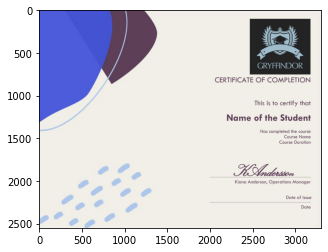

In [14]:
original = cv2.imread("/content/sample.jpg")
plt.imshow(original)

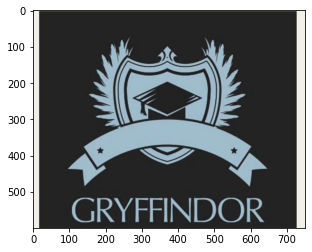

In [16]:
sample = cv2.imread("/content/sample.jpg")
original_logo = sample[100:700, 2450:3200]
plt.imshow(original_logo)

In [17]:
import pandas as pd
db = pd.read_csv("/content/data.csv")
db.head(6)

,SERIAL NO,STUDENT NAME,COURSE TAKEN,DURATION,DATE OF ISSUE
0,1,ABHAY KUMAR,DEEP LEARNING SPECIALIZATION,JAN21 - JUNE21,05-10-2021
1,2,ABHIRUP SARKAR,DEEP LEARNING SPECIALIZATION,JULY21 - DEC21,27-09-2021
2,3,ABHISHEK KUMAR,DEEP LEARNING SPECIALIZATION,JAN21 - JUNE21,16-10-2021
3,4,ANAND GUPTA,ADVANCED MACHINE LEARNING SPECIALIZATION,JAN21 - JUNE21,10-10-2021
4,5,ANKIT AGARWAL,ADVANCED MACHINE LEARNING SPECIALIZATION,JULY21 - DEC21,11-10-2021
5,6,ANKITA TIWARY,ADVANCED MACHINE LEARNING SPECIALIZATION,JAN21 - JUNE21,12-10-2021


In [18]:
test = cv2.imread("/content/test1.jpg")
output = reader.readtext(test)
output


[([[2544, 600], [3099, 600], [3099, 698], [2544, 698]],
  'GRYFFINDOR',
  0.9344034269056148),
 ([[2050, 775], [3188, 775], [3188, 862], [2050, 862]],
  'CERTIFICATE OF COMPLETION',
  0.5733513164601907),
 ([[2511, 1038], [3191, 1038], [3191, 1142], [2511, 1142]],
  'This is to certify that',
  0.9619148468969697),
 ([[2500, 1206], [3184, 1206], [3184, 1307], [2500, 1307]],
  'DIVYA SINGH',
  0.9218049893023907),
 ([[2582, 1384], [3187, 1384], [3187, 1464], [2582, 1464]],
  'Has completed the course',
  0.9240254412941388),
 ([[2177, 1445], [3190, 1445], [3190, 1523], [2177, 1523]],
  'Advanced Machine Learning Specialization',
  0.8313378995000418),
 ([[2801, 1517], [2948, 1517], [2948, 1574], [2801, 1574]],
  'Jan21',
  0.9262058371489974),
 ([[3007, 1517], [3177, 1517], [3177, 1574], [3007, 1574]],
  'June21',
  0.9993154461357913),
 ([[2269, 1771], [3015, 1771], [3015, 1978], [2269, 1978]],
  '3dendson',
  0.24194398015046029),
 ([[2281, 1977], [3189, 1977], [3189, 2052], [2281, 20

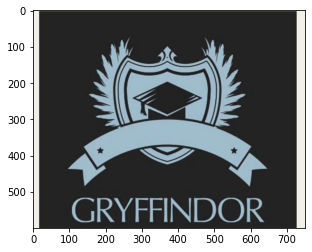

In [20]:
logo=test[100:700, 2450:3200]
plt.imshow(logo)

In [34]:
name = output[3][1]
print(name)
course = output[5][1]
print(course)
date = output[10][1]
print(date)

DIVYA SINGH
Advanced Machine Learning Specialization
01-10-2021


In [35]:
from PIL import Image

In [36]:
image_tensor_a= tf.convert_to_tensor(original_logo)

In [37]:
image_tensor_b = tf.convert_to_tensor(logo)


In [38]:
def checking(image_tensor_a, image_tensor_b):
  
  
  image_to_tensor_a = tf.keras.preprocessing.image.smart_resize(image_tensor_a,(224,224))
  image_to_tensor_b = tf.keras.preprocessing.image.smart_resize(image_tensor_b,(224,224))

  feature_of_image_a = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", trainable=True)([image_to_tensor_a])
  feature_of_image_b = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", trainable=False)([image_to_tensor_b])

  similarity = tf.keras.losses.cosine_similarity(
    [feature_of_image_a],
    [feature_of_image_b],
    axis=-1,
  )
  
  similarity_b = tf.math.reduce_sum(similarity[0])
  print(similarity_b.numpy())

  if similarity_b.numpy()<-0.8:
    return "yes"
  else:
    return "no"

In [39]:


if checking(image_tensor_a,image_tensor_b) == "yes":
  count = 0
  nameFlag = 0
  courseFlag = 0
  dateFlag = 0
  for i in db['STUDENT NAME']:
    if(i.upper() == name.upper()):
      nameFlag = 1
      if(db.iloc[count]['COURSE TAKEN'].upper() == course.upper()):
        courseFlag = 1
        if(db.iloc[count]['DATE OF ISSUE'] == date):
          print("Valid Certificate")
          dateFlag = 1
    count = count + 1
  if(nameFlag == 0):
    print("Invalid Certificate, Name not Found")
  elif(courseFlag == 0):
    print("Invalid Certificate, Course Mismatch")
  elif(dateFlag == 0):
    print("Invalid Certificate, Issue Date Mismatch")
else:
  print("Invalid Certifiace, logo Mismatch")

-0.9999999
Valid Certificate
